In [26]:
pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 56.2 MB/s eta 0:00:00


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [31]:
import logging
import warnings
logging.getLogger('prophet').setLevel(logging.ERROR)#suppress neuralprophet logging messages
warnings.filterwarnings("ignore")#suppress other warnings


In [32]:
data = pd.read_csv('bike_sharing_daily.csv')

In [33]:
#convert the date column to datetime format for time series analysis
data["ds"] = pd.to_datetime(data["dteday"])

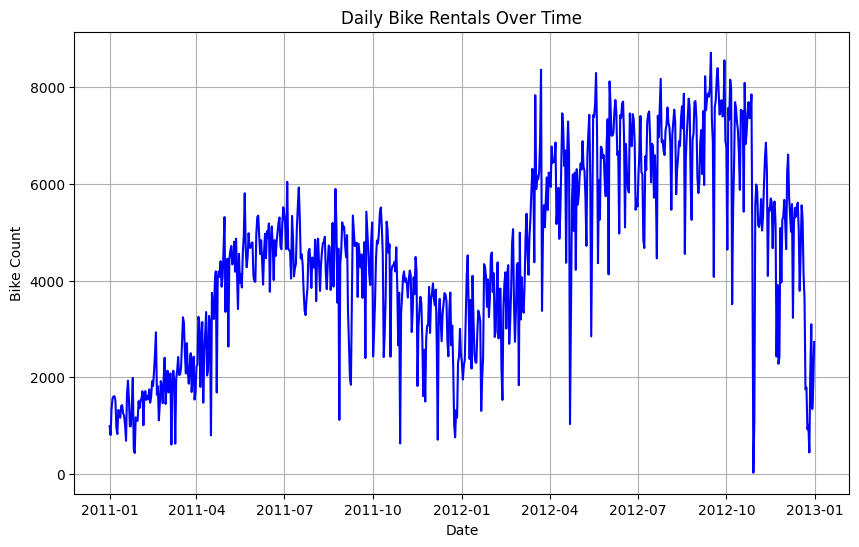

In [34]:
#visualize the historical bike usage data
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data["cnt"], color='blue')
plt.xlabel("Date")
plt.ylabel("Bike Count")
plt.title("Daily Bike Rentals Over Time")
plt.grid(True)
plt.show()

In [36]:
df=data[['ds','cnt']].copy()#selects the (date) and (count of bikes rented) columns and creates a copy of them.
df.columns=['ds','y']#renames the columns to 'ds' for the date and 'y' for the target variable (bike count).
#to avoid changes in the original file

In [37]:
#define quantiles for prediction intervals
quantilelist=[0.05,0.1,0.5,0.9,0.95]

In [38]:
m=NeuralProphet(
    quantiles=quantilelist,
    yearlyseasonality=True,
    weeklyseasonality=True,
    dailyseasonality=False#set to false as daily seasonality might not be relevant
)

In [39]:
#add country holidays to capture holiday effects on bike rentals
m = m.add_country_holidays("US")

In [40]:
#set plotting backend to matplotlib
m.set_plotting_backend("matplotlib")

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


In [41]:
df_train,df_test=m.split_df(df, valid_p=0.2)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [42]:
#fit the model on the training data and validate on the test data
metrics=m.fit(df_train,validation_df=df_test,progress="bar")
print("Training and Validation Metrics:\n", metrics.tail())

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.829% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.829% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 130
INFO:NP.config:Auto-set epochs to 130


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (19) is too small than the required number                     for the learning rate finder (220). The results might not be optimal.


Finding best initial lr:   0%|          | 0/220 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Training and Validation Metrics:
          MAE_val     RMSE_val  Loss_val  RegLoss_val  epoch  train_loss  \
125  1117.413574  1426.238159  0.137835          0.0    125    0.035740   
126  1115.658203  1426.145142  0.137658          0.0    126    0.035757   
127  1114.965942  1424.955444  0.137302          0.0    127    0.035765   
128  1114.366943  1424.650879  0.137181          0.0    128    0.035746   
129  1112.934937  1423.956787  0.136949          0.0    129    0.035741   

     reg_loss         MAE        RMSE      Loss  RegLoss  
125       0.0  606.058350  814.979980  0.035036      0.0  
126       0.0  614.899170  825.001770  0.036546      0.0  
127       0.0  607.776978  803.296204  0.035318      0.0  
128       0.0  618.241394  835.833801  0.036912      0.0  
129       0.0  603.985168  812.735107  0.035283      0.0  


In [43]:

# Create a future dataframe to make predictions for the next 365 days
future=m.make_future_dataframe(df,periods=365)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [44]:
#generate the forecast based on the trained model
forecast = m.predict(future)
print("Forecast Data (Last 5 Days):\n", forecast.tail())

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


Forecast Data (Last 5 Days):
             ds     y        yhat1   yhat1 5.0%  yhat1 10.0%  yhat1 90.0%  \
360 2013-12-27  None  5532.493652  3033.015869  4004.726318  5532.493652   
361 2013-12-28  None  5455.005371  2384.375000  3481.192871  5455.005371   
362 2013-12-29  None  5272.883301  2634.841064  3724.799072  5272.883301   
363 2013-12-30  None  5369.407715  2899.738525  3813.872803  5369.407715   
364 2013-12-31  None  5498.280273  3224.951660  4098.899902  5498.280273   

     yhat1 95.0%        trend  season_yearly  season_weekly  ...  \
360  7187.936523  7125.810059   -1692.144531      98.828133  ...   
361  7379.898438  7128.648438   -1695.589600      21.946514  ...   
362  6912.196777  7131.486816   -1697.213013    -161.390564  ...   
363  6913.177246  7134.326172   -1697.013306     -67.905174  ...   
364  7110.851562  7137.164551   -1695.077759      56.193398  ...   

     event_Independence Day  event_Labor Day  \
360                     0.0              0.0   
361     

In [46]:

#extract actual values from the test set
y_actual=df_test['y'].values
print(y_actual)

[7534 7286 5786 6299 6544 6883 6784 7347 7605 7148 7865 4549 6530 7006
 7375 7765 7582 6053 5255 6917 7040 7697 7713 7350 6140 5810 6034 6864
 7112 6203 7504 5976 8227 7525 7767 7870 7804 8009 8714 7333 6869 4073
 7591 7720 8167 8395 7907 7436 7538 7733 7393 7415 8555 6889 6778 4639
 7572 7328 8156 7965 3510 5478 6392 7691 7570 7282 7109 6639 5875 7534
 7461 7509 5424 8090 6824 7058 7466 7693 7359 7444 7852 4459   22 1096
 5566 5986 5847 5138 5107 5259 5686 5035 5315 5992 6536 6852 6269 4094
 5495 5445 5698 5629 4669 5499 5634 5146 2425 3910 2277 2424 5087 3959
 5260 5323 5668 5191 4649 6234 6606 5729 5375 5008 5582 3228 5170 5501
 5319 5532 5611 5047 3786 4585 5557 5267 4128 3623 1749 1787  920 1013
  441 2114 3095 1341 1796 2729]


In [47]:
#prepare the data for Random Forest model
X=data[['temp','hum','windspeed']]#example features
y=data['cnt']

In [49]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
# Initialize and fit the Random Forest model
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
#make predictions
y_rf_pred = rf_model.predict(X_test)

In [53]:
# Calculate metrics for Random Forest
rf_mae=mean_absolute_error(y_test,y_rf_pred)
rf_mse=mean_squared_error(y_test,y_rf_pred)
rf_rmse=np.sqrt(rf_mse)

In [54]:

print(f"Random Forest MAE: {rf_mae:.2f}, MSE: {rf_mse:.2f}, RMSE: {rf_rmse:.2f}")

Random Forest MAE: 1176.38, MSE: 2130239.65, RMSE: 1459.53


In [55]:
#get predictions from NeuralProphet
y_np_pred=forecast['yhat1'].values[-len(y_actual):]#get predictions corresponding to the test set

In [57]:

#calculate accuracy metrics for np
mae_np = mean_absolute_error(y_actual, y_np_pred)
mse_np = mean_squared_error(y_actual, y_np_pred)
rmse_np = np.sqrt(mse_np)

In [58]:
print(f"\nNeuralProphet Accuracy Metrics:\nMAE: {mae_np:.2f}\nMSE: {mse_np:.2f}\nRMSE: {rmse_np:.2f}")


NeuralProphet Accuracy Metrics:
MAE: 1127.85
MSE: 2744817.35
RMSE: 1656.75


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


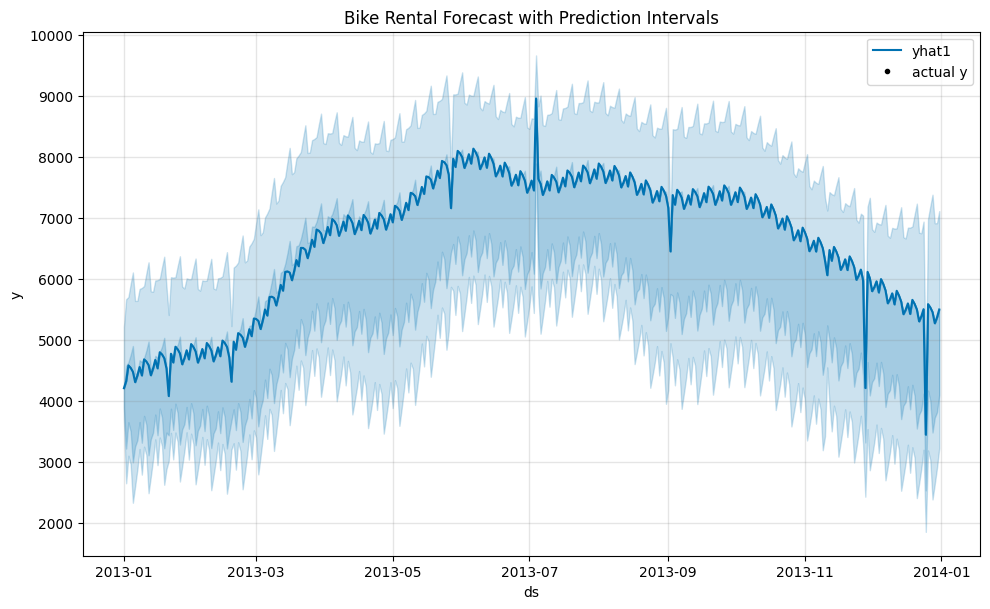

In [59]:
# Plot the forecast including historical data and prediction intervals
fig_forecast = m.plot(forecast, plotting_backend="matplotlib")
plt.title("Bike Rental Forecast with Prediction Intervals")
plt.show()

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


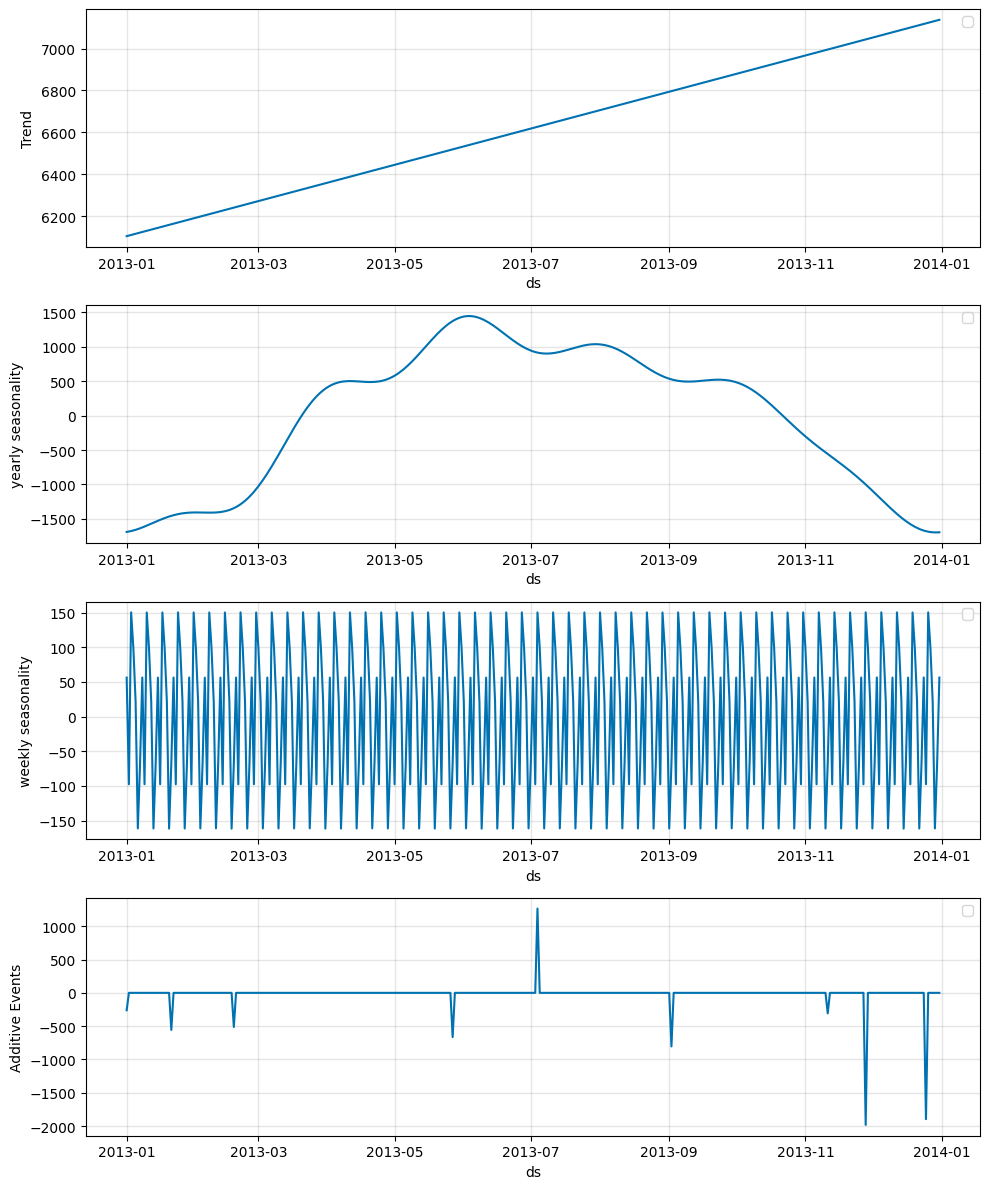

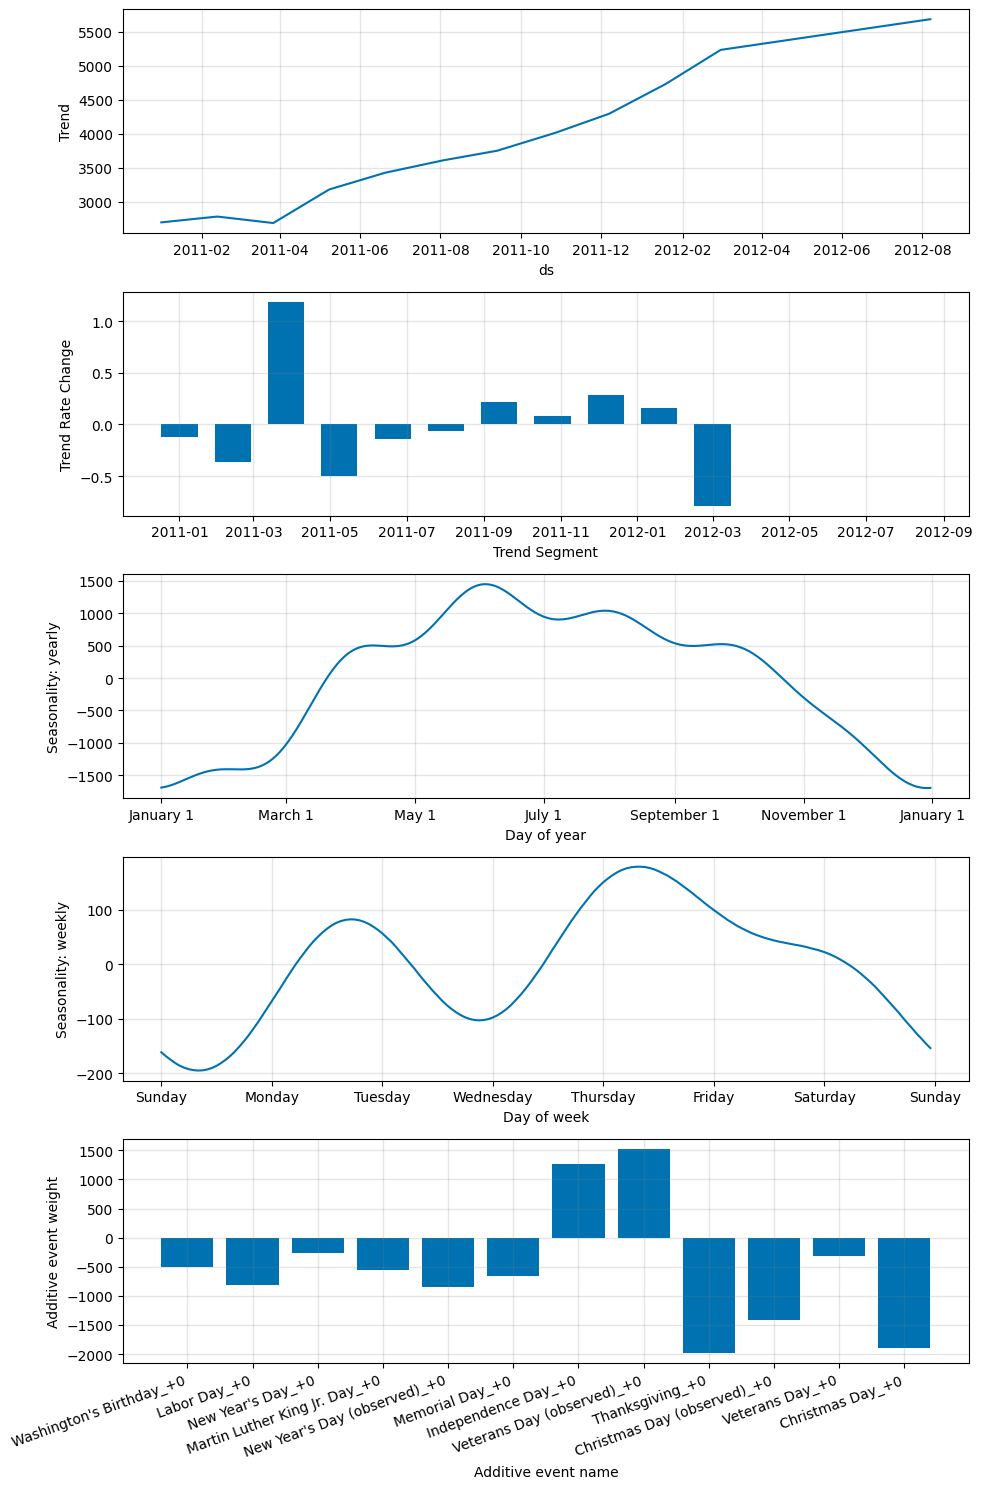

In [60]:
#additional diagnostic plots optional useful for understanding the model's performance)
fig_components=m.plot_components(forecast, plotting_backend="matplotlib")
fig_parameters=m.plot_parameters(plotting_backend="matplotlib")
